In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# afaire si fichier sample pas cree
df = pd.read_csv('df_feats.csv', index_col=0)
from sklearn.model_selection import train_test_split
from collections import Counter

df_sample, _ = train_test_split(df, train_size=1500, stratify=df.TARGET, random_state=1944)

print('df', Counter(df.TARGET))
print('df_sample', Counter(df_sample.TARGET))

#df_sample.to_csv('df_feats_sample.csv')

df Counter({0: 282682, 1: 24824})
df_sample Counter({0: 1379, 1: 121})


In [2]:
df_sample = pd.read_csv('df_feats_sample.csv', index_col=0)

In [3]:
import pickle

#premiere fois pour creer le modele
#with open('lgbmc10_feats_custom.p', 'rb') as f2:
#    grid_lgbm = pickle.load(f2)

with open('feats_sample_explainer_shap.p', 'rb') as f3:
    explainer_shap = pickle.load(f3)

with open('feats_sample_shap_values_lgb.p', 'rb') as f4:
    shap_values_lgb = pickle.load(f4)


In [4]:
df_sample_target = df_sample.TARGET
df_sample.drop(columns='TARGET', inplace=True)

# SHAP pour interpreter resultat
https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d

https://towardsdatascience.com/demystify-your-ml-model-with-shap-fc191a1cb08a

https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423

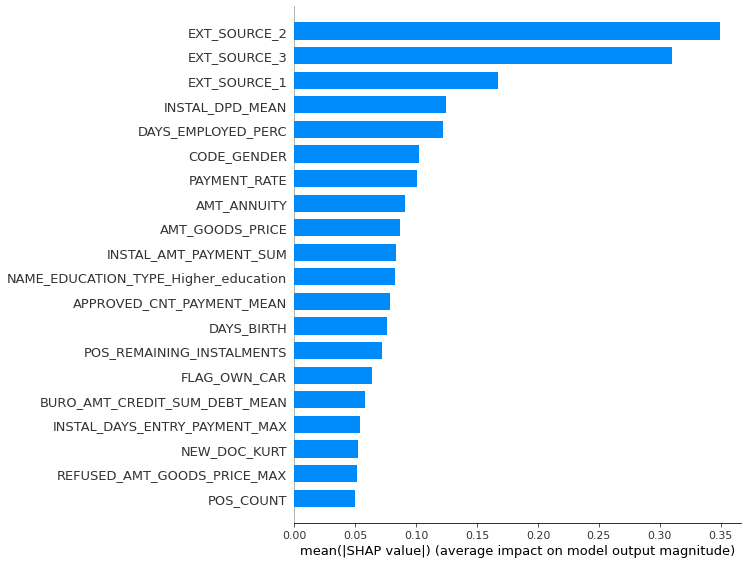

In [5]:
# conda install -c conda-forge shap
import shap

#explainer_shap = shap.TreeExplainer(grid_lgbm)

shap_values_lgb = explainer_shap.shap_values(df_sample)

shap.summary_plot(shap_values_lgb[1], df_sample, plot_type="bar")

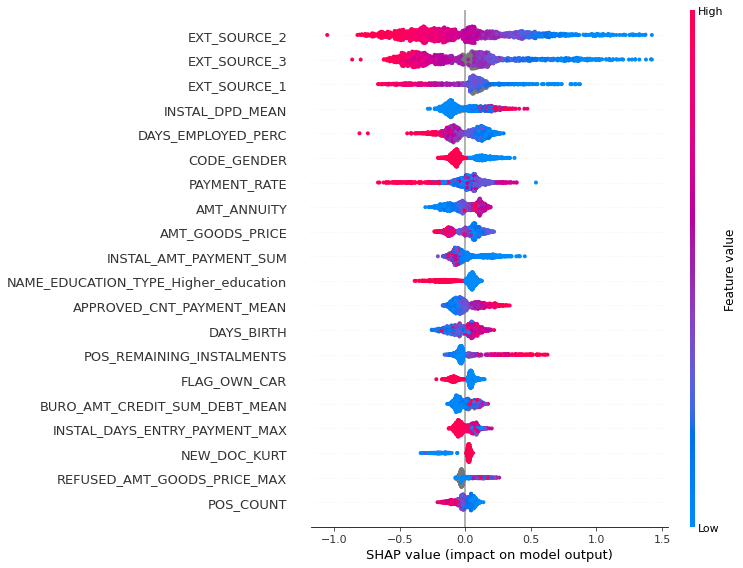

In [6]:
f = plt.figure()
shap.summary_plot(shap_values_lgb[1], df_sample)
#f.savefig("summary_plot_lgbm.png", bbox_inches='tight', dpi=600)

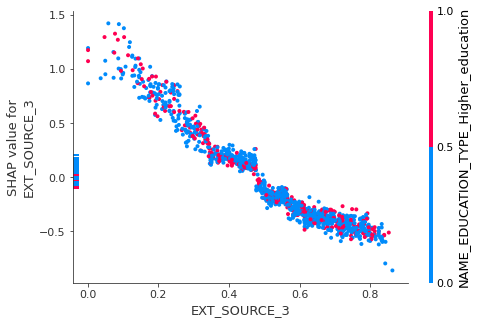

In [11]:
import shap
# make plot.
shap.dependence_plot('EXT_SOURCE_3', shap_values_lgb[1], df_sample)

In [7]:
explainer_shap.expected_value[1]

-0.5813475526725127

In [8]:
index1500 = [i for i in range(0,1500)]

In [9]:
df_sample.index = index1500
df_sample_target.index = index1500

In [10]:
df_sample.iloc[df_sample[df_sample.SK_ID_CURR==251896].index,:]

,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,PREV_SK_ID_PREV_NUNIQUE,...,BURO_CREDIT_TYPE_Mortgage_MEAN,AMT_GOODS_PRICE,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,NONLIVINGAPARTMENTS_MEDI,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
35,251896,0.0,NaN,1.0,2.0,NaN,NaN,NaN,20.0,1.0,...,0.0,445500.0,10.0,0,0,NaN,NaN,0,3456.99,48397.5


In [21]:
pd.DataFrame(shap_values_lgb[1]).to_csv('feats_sample_shap_values_lgb.csv')

### essai avec target == 1

In [22]:
d_feats = pd.read_csv('feats_sample_shap_values_lgb.csv', index_col=0)

In [27]:
#print(shap_values_lgb[1][i])
print(d_feats.loc[i].values)

[-8.63724420e-03 -1.17953984e-03 -2.02328235e-03  7.61792614e-03
  3.31166982e-01 -9.39374535e-04  1.43223910e-03  6.70645040e-04
 -1.76382365e-01 -1.83621423e-05  0.00000000e+00  2.00377901e-02
  0.00000000e+00  2.89828434e-03  7.80870184e-03 -2.56522799e-03
 -9.41318558e-03 -3.20255855e-04  3.82457953e-02  6.43153677e-02
 -1.87307887e-03  5.89011226e-03  1.13210877e-02  3.10610560e-03
  5.77644690e-02 -3.79898417e-03  6.03519589e-02 -2.86474542e-03
 -9.63747520e-04 -1.64747042e-03  1.16845377e-01 -2.08664599e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.91551665e-03 -3.63864076e-04  3.84353158e-04  3.46772031e-04
  3.85596731e-03  3.52578477e-02 -6.52502892e-05  2.32537474e-02
 -3.44426928e-02 -1.26744966e-03 -2.62534041e-03  1.71154281e-04
 -1.04846889e-04  2.57403898e-02  0.00000000e+00  9.39443110e-04
  0.00000000e+00 -4.03055335e-03  1.13388866e-02  2.08808695e-02
 -9.42133561e-03  0.00000000e+00  2.01969027e-02 -5.47264952e-03
 -7.00878172e-03 -4.97395

In [28]:
i=df_sample[df_sample.SK_ID_CURR==100558].index.values[0]
print(i)
shap.initjs()
#shap.force_plot(explainer_shap.expected_value[1], shap_values_lgb[1][i], df_sample.iloc[i,:])
shap.force_plot(explainer_shap.expected_value[1], d_feats.loc[i].values, df_sample.iloc[i,:])


250


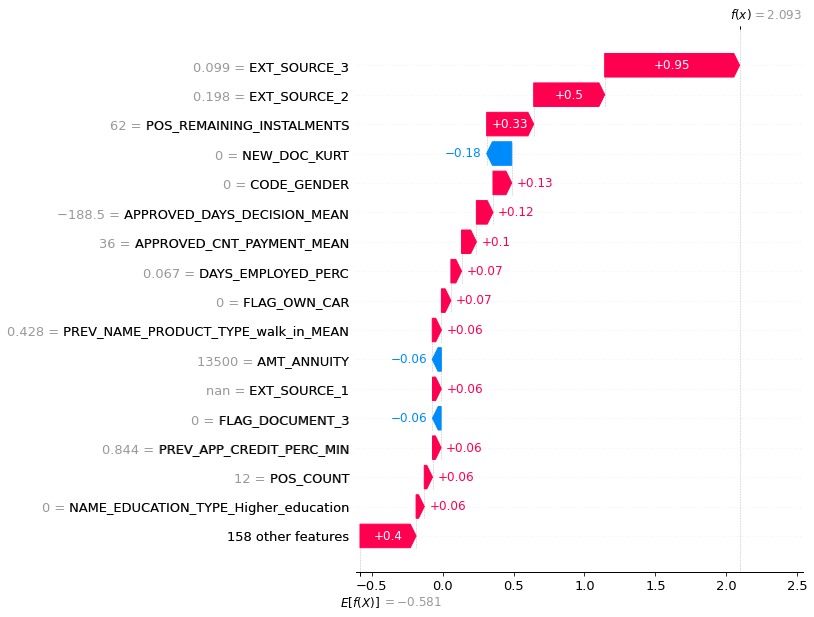

In [29]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        
shap_object = ShapObject(base_values = explainer_shap.expected_value[1],
                         values = d_feats.loc[i].values,
                         feature_names = df_sample.columns,
                         data = df_sample.iloc[i,:])

shap.waterfall_plot(shap_object, max_display=17)

In [43]:
shap_values_lgb[1][i]

array([-2.11071664e-03, -1.53679328e-03, -2.65328317e-04,  4.29722938e-03,
       -3.90513519e-02, -9.08049200e-04,  7.83903093e-04,  7.45446315e-04,
        3.03222400e-02, -7.02340409e-04,  0.00000000e+00, -2.87774073e-02,
        0.00000000e+00,  3.13168392e-03,  4.10332208e-03,  3.97692162e-02,
        5.28159576e-02,  5.60433149e-02,  2.19766507e-02, -2.05400106e-02,
        1.78301095e-02,  6.42486852e-03, -9.70504662e-04, -1.66563078e-02,
        4.40394584e-02, -3.80268807e-03, -1.96976873e-02, -2.56373407e-03,
       -1.53528495e-03, -5.71340896e-04,  4.66132361e-02,  6.55957643e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.03014176e-03, -2.14056335e-04, -1.63667745e-03,  1.32069257e-03,
        5.06255461e-03, -1.51356253e-01, -2.48535689e-05,  1.18507243e-02,
        1.77981631e-01, -2.37135464e-03, -2.07061506e-02,  6.79680418e-04,
       -2.74457486e-04, -4.17289154e-02,  0.00000000e+00,  5.75047141e-04,
        0.00000000e+00, -

In [27]:
df_shap = pd.DataFrame(shap_object.values,shap_object.feature_names)

In [30]:
df_shap.columns = ["shap_values"]

In [39]:
df_shap[['shap_abs']] = np.abs(df_shap.shap_values)

In [40]:
df_shap.sort_values(by='shap_abs', ascending=False).head(17)

,shap_values,shap_abs
EXT_SOURCE_1,0.627332,0.627332
INSTAL_AMT_PAYMENT_SUM,0.310424,0.310424
PAYMENT_RATE,0.292766,0.292766
EXT_SOURCE_2,-0.231307,0.231307
DAYS_BIRTH,0.177982,0.177982
AMT_GOODS_PRICE,0.171801,0.171801
EXT_SOURCE_3,0.159584,0.159584
INSTAL_DPD_MEAN,-0.151356,0.151356
AMT_ANNUITY,0.129555,0.129555
DAYS_EMPLOYED_PERC,0.102930,0.102930


In [30]:
explainer_shap.expected_value[1]

-0.5813475526725127

### essai avec target == 0

In [28]:
i=32

shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], shap_values_lgb[1][i], df_sample.iloc[i,:])

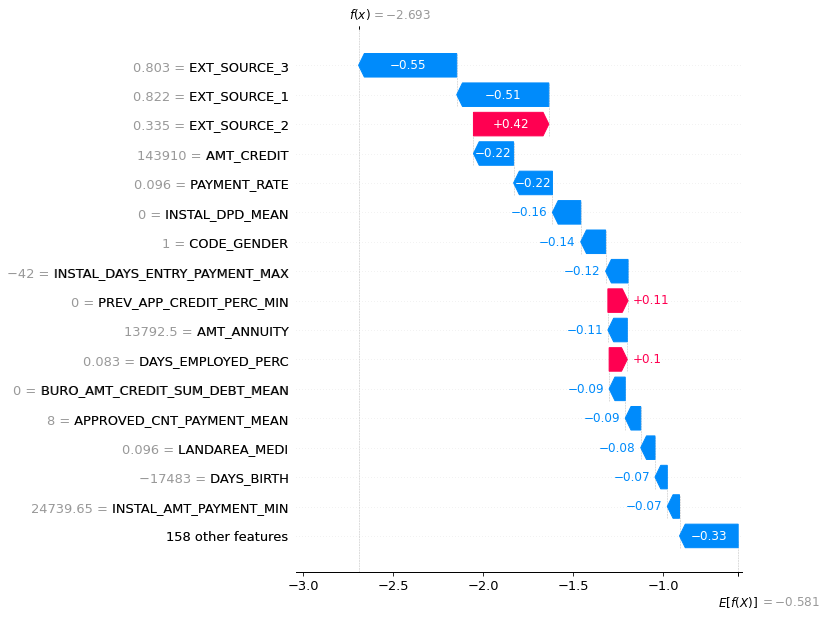

In [29]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        
shap_object = ShapObject(base_values = explainer_shap.expected_value[1],
                         values = shap_values_lgb[1][i],
                         feature_names = df_sample.columns,
                         data = df_sample.iloc[i,:])

shap.waterfall_plot(shap_object, max_display=17)

### sauvegarde modele shapley pour dashboard

In [ ]:
# afaire si shapvalues pas enregistre
with open('feats_sample_explainer_shap.p', 'wb') as f4:
    pickle.dump(explainer_shap, f4)

with open('feats_sample_shap_values_lgb.p', 'wb') as f4:
    pickle.dump(shap_values_lgb[1], f4)

pd.DataFrame(shap_values_lgb[1]).to_csv('feats_sample_shap_values_lgb.csv')